In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# LEN OF STAY - ANLYTCS VIDYA DATASET


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
train = pd.read_csv('/content/drive/MyDrive/6th sem proj/dataset/dt_aly_vid/train.csv')
test = pd.read_csv('/content/drive/MyDrive/6th sem proj/dataset/dt_aly_vid/test.csv')
# dictionary = pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data_dictionary.csv')
# sample = pd.read_csv('/content/drive/MyDrive/6th sem proj/dataset/dt_aly_vid/test.csv')

In [6]:
train.shape


(318438, 18)

In [7]:
test.shape

(137057, 17)

In [8]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [9]:
train.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [10]:
# 1. Exploratory Data Analysis

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [12]:
# dictionary
# Column	Description
# 0	case_id	Case_ID registered in Hospital
# 1	Hospital_code	Unique code for the Hospital
# 2	Hospital_type_code	Unique code for the type of Hospital
# 3	City_Code_Hospital	City Code of the Hospital
# 4	Hospital_region_code	Region Code of the Hospital
# 5	Available Extra Rooms in Hospital	Number of Extra rooms available in the Hospital
# 6	Department	Department overlooking the case
# 7	Ward_Type	Code for the Ward type
# 8	Ward_Facility_Code	Code for the Ward Facility
# 9	Bed Grade	Condition of Bed in the Ward
# 10	patientid	Unique Patient Id
# 11	City_Code_Patient	City Code for the patient
# 12	Type of Admission	Admission Type registered by the Hospital
# 13	Severity of Illness	Severity of the illness recorded at the time o...
# 14	Visitors with Patient	Number of Visitors with the patient
# 15	Age	Age of the patient
# 16	Admission_Deposit	Deposit at the Admission Time
# 17	Stay	Stay Days by the patient

In [13]:
# Hypothesis:
# The following features may have relevance with the Length of Stay of a patient

# Department: Relates to the type of disease
# Type of Admission: Relates to patients' reason of admission to the hospital
# Severity of Illness: Relates to the curability of disease
# Age: Relates to the curability of disease

In [14]:
# Exploratory Data Analysis (EDA) for a Length of Stay (LOS) project involves examining the dataset to understand patterns, distributions, and key factors affecting hospital stay durations. It includes:

# Descriptive Statistics – Summarizing LOS with mean, median, and standard deviation.
# Data Visualization – Using histograms, box plots, and bar charts to identify trends and outliers.
# Correlation Analysis – Checking relationships between LOS and features like age, diagnosis, and treatments.
# Missing Values & Anomalies – Detecting and handling missing or incorrect data.
# Feature Engineering – Creating new relevant features to improve prediction models.
# This step helps in identifying important patterns and guiding further analysis or modeling.

In [15]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [16]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [18]:
train.Stay.value_counts()

,count
Stay,
21-30,87491
11-20,78139
31-40,55159
51-60,35018
0-10,23604
41-50,11743
71-80,10254
More than 100 Days,6683
81-90,4838


<Axes: xlabel='Stay'>

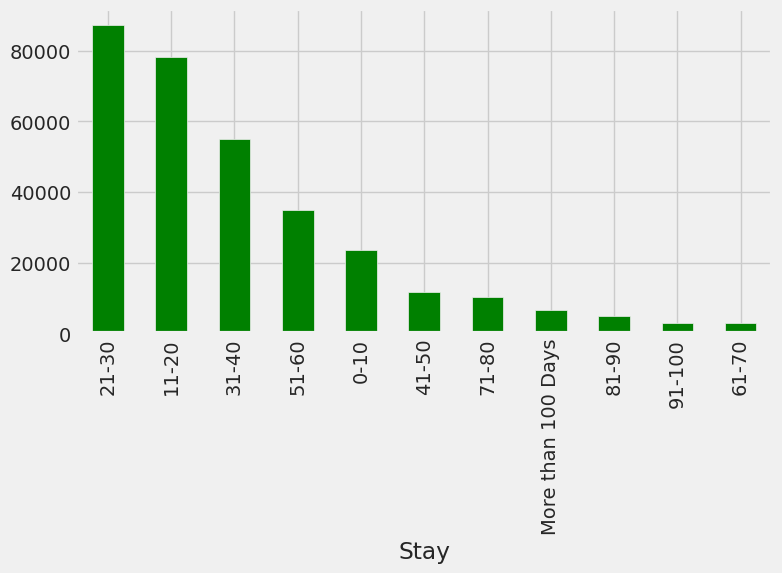

In [19]:
# Distribution of target feature
plt.figure(figsize=(8,4))
train.Stay.value_counts().plot(kind="bar", color = ['green'])

In [20]:
# As per abv fig:

# Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40

In [21]:
# Insight: Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40

SyntaxError: invalid syntax (<ipython-input-21-a64eceb20989>, line 1)

In [22]:
# Check for unique values in every column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[ 2.  3.  4.  1. nan]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 

In [23]:
# change cat. cols to num.

# Categorical features which need to be encoded:
# Hospital_region_code
# Department
# Ward_Type
# Admission
# Illness


# Bins (range) which need to be encoded:
# Age
# Stay (Target)

In [24]:
# Check for null values
train.isna().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available Extra Rooms in Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed Grade,113


**2 Data Processing & Feature engineering**


In [25]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)

In [26]:
# 2a Encoding categorical features

In [27]:
# Combine test and train dataset for processing
combined = [train, test]

In [28]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [29]:
combined[1].Department.unique()

array([2, 1, 0, 3, 4])

In [30]:
# Ward type
for dataset in combined:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [31]:
combined[0].head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,3,3,5,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,2,1,3,4,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,2,3,2,3,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,2,3,3,3,1,0,2,51-60,5558.0,41-50


In [ ]:
# 2b Binning features

<Axes: >

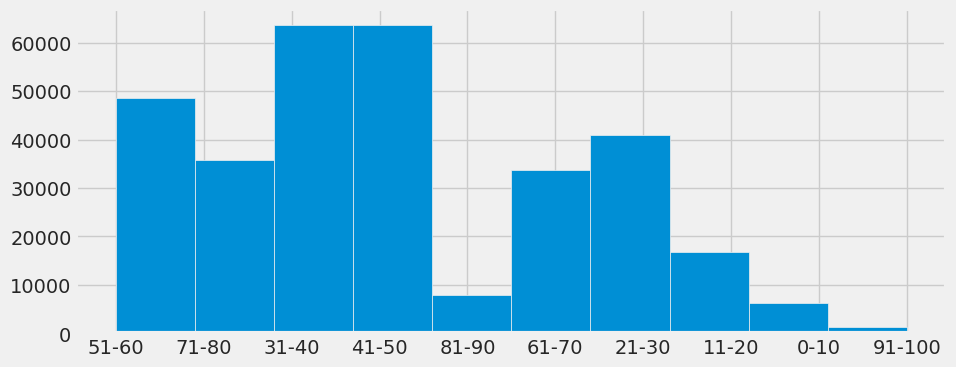

In [33]:
# Check age distribution
plt.figure(figsize=(10,4))
combined[0].Age.hist()

In [34]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [35]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [36]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

<ipython-input-36-c24d4be3abde>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())


In [ ]:
# for stay col.

In [37]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [41]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [42]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<ipython-input-42-de3dd2f47bae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())


<Axes: >

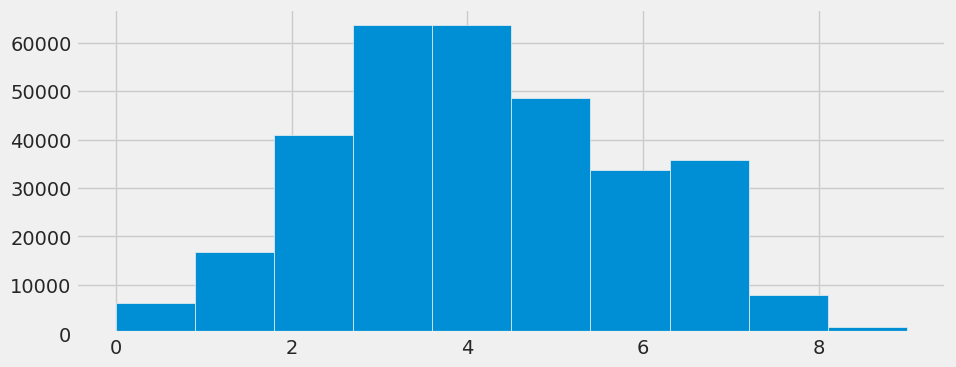

In [44]:
plt.figure(figsize=(10,4))
combined[0].Age.hist()

In [45]:
for dataset in combined:
    print(dataset.shape)

(318438, 14)
(137057, 13)


In [ ]:
# 2c. Scaling numerical data

In [46]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']

In [47]:
len(columns_list)

4

In [48]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for dataset in combined:
    dataset[columns_list]= ss.fit_transform(dataset[columns_list].values)

In [49]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,-0.169177,3,2,5,-1.136165,0,-0.727923,5,0.027835,0
1,2,2,2,5,-1.025217,3,3,5,0.315306,0,-0.727923,5,0.987556,4
2,3,10,4,1,-1.025217,1,3,4,0.315306,0,-0.727923,5,-0.124910,3
3,4,26,1,2,-1.025217,3,2,3,0.315306,0,-0.727923,5,2.200319,4
4,5,26,1,2,-1.025217,3,3,3,0.315306,0,-0.727923,5,0.623175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,-0.169177,3,1,5,-1.136165,2,-0.161049,4,-0.677923,1
318434,318435,24,0,1,-1.025217,1,1,4,1.766778,2,0.405826,8,1.673071,3
318435,318436,7,0,4,-0.169177,2,2,5,-1.136165,1,-0.161049,7,-0.594189,1
318436,318437,11,1,2,-0.169177,1,1,3,0.315306,1,0.972701,1,-1.030342,1


<Axes: >

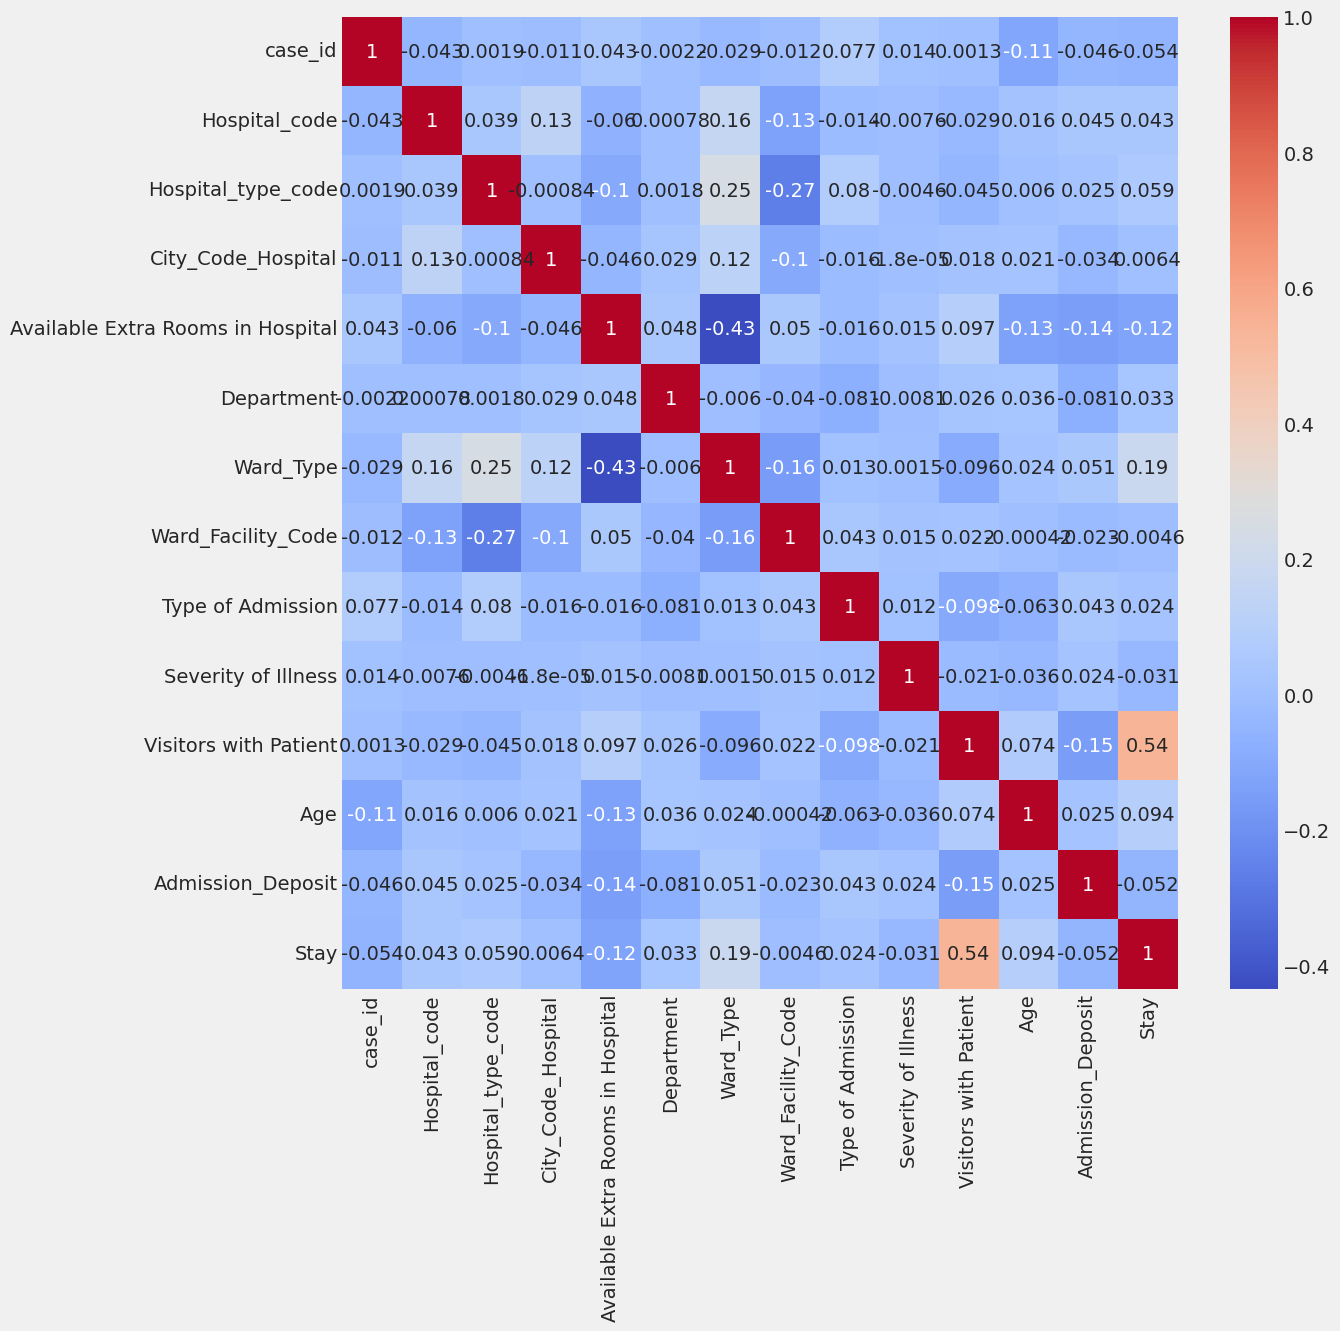

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(combined[0].corr(), annot=True, cmap='coolwarm')

3. Data Modelling


In [51]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
train = combined[0]
test = combined[1]

In [63]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype='object')

In [53]:
X_train = train.drop(['case_id', 'Stay'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop("case_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((318438, 12), (318438,), (137057, 12))

In [54]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')

In [55]:
Y_train

,Stay
0,0
1,4
2,3
3,4
4,4
...,...
318433,1
318434,3
318435,1
318436,1


In [56]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

58.09

In [70]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_test = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.71

In [ ]:
# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

<Axes: >

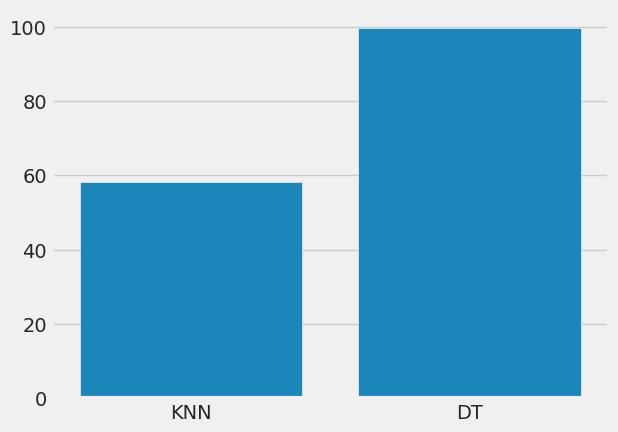

In [58]:
sns.barplot(x= ['KNN','DT'],y= [acc_knn, acc_decision_tree])

In [71]:
print("Test predictions:")
(Y_pred_test)

Test predictions:


array([0, 7, 2, ..., 0, 1, 3])

In [65]:
import pickle

In [72]:
# Save Model as Pickle File
model_filename = "decision_tree_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(decision_tree, file)

print(f"Model saved as {model_filename}")

Model saved as decision_tree_model.pkl


In [75]:
# # Evaluate the model on the train set
# evaluate_model(model_filename)

In [85]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the evaluate_model function
def evaluate_model(model_filename):
    """Evaluates the saved model on the training data."""
    # Load the saved model
    with open(model_filename, "rb") as file:
        loaded_model = pickle.load(file)

    # Make predictions on the train set
    Y_pred_train = loaded_model.predict(X_train)

    # Evaluate the model
    accuracy = accuracy_score(Y_train, Y_pred_train)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(Y_train, Y_pred_train))

    print("\nConfusion Matrix:")
    print(confusion_matrix(Y_train, Y_pred_train))

# Evaluate the model on the train set
evaluate_model(model_filename)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23604
           1       0.99      1.00      1.00     78139
           2       1.00      1.00      1.00     87491
           3       1.00      1.00      1.00     55159
           4       1.00      0.99      1.00     11743
           5       1.00      1.00      1.00     35018
           6       1.00      0.99      1.00      2744
           7       1.00      1.00      1.00     10254
           8       1.00      1.00      1.00      4838
           9       1.00      1.00      1.00      2765
          10       1.00      1.00      1.00      6683

    accuracy                           1.00    318438
   macro avg       1.00      1.00      1.00    318438
weighted avg       1.00      1.00      1.00    318438


Confusion Matrix:
[[23598     6     0     0     0     0     0     0     0     0     0]
 [  101 78034     2     2     0     0     0     0     0     

In [ ]:
# feature_df_imp


Feature Importances:
                              Feature  Importance
11                  Admission_Deposit    0.462932
10                                Age    0.131433
9               Visitors with Patient    0.082639
3   Available Extra Rooms in Hospital    0.076899
5                           Ward_Type    0.047815
0                       Hospital_code    0.046499
4                          Department    0.043298
8                 Severity of Illness    0.027971
2                  City_Code_Hospital    0.024453
7                   Type of Admission    0.022318
1                  Hospital_type_code    0.017835
6                  Ward_Facility_Code    0.015910


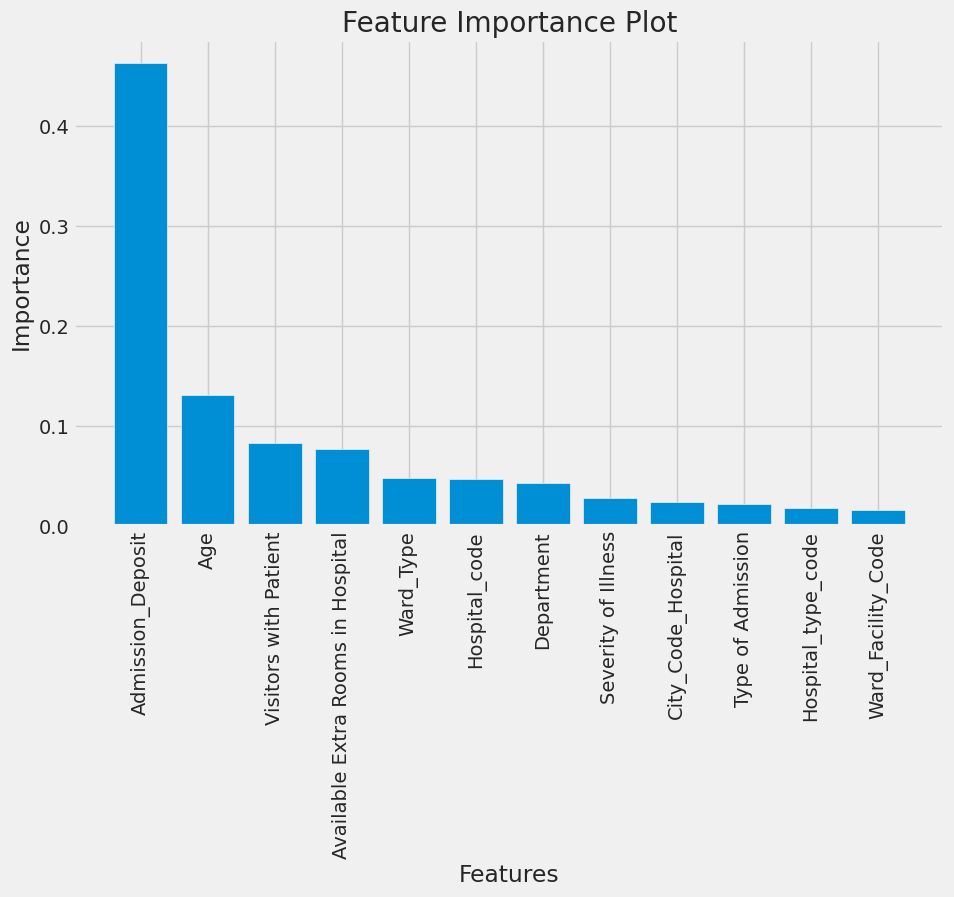

In [86]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt



# Define the evaluate_model function
def evaluate_model3(model_filename):
    """Evaluates the saved model and displays important features."""
    # Load the saved model
    with open(model_filename, "rb") as file:
        loaded_model = pickle.load(file)

    # Make predictions on the train set
    Y_pred = loaded_model.predict(X_train)


    # Get feature importances
    importances = loaded_model.feature_importances_
    feature_names = X_train.columns  # Assuming X_train has feature names

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display feature importances
    print("\nFeature Importances:")
    print(feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance Plot")
    plt.show()


# Evaluate the model and display important features
evaluate_model3(model_filename)


Feature Importances:
                              Feature  Importance
11                  Admission_Deposit    0.462932
10                                Age    0.131433
9               Visitors with Patient    0.082639
3   Available Extra Rooms in Hospital    0.076899
5                           Ward_Type    0.047815
0                       Hospital_code    0.046499
4                          Department    0.043298
8                 Severity of Illness    0.027971
2                  City_Code_Hospital    0.024453
7                   Type of Admission    0.022318
1                  Hospital_type_code    0.017835
6                  Ward_Facility_Code    0.015910


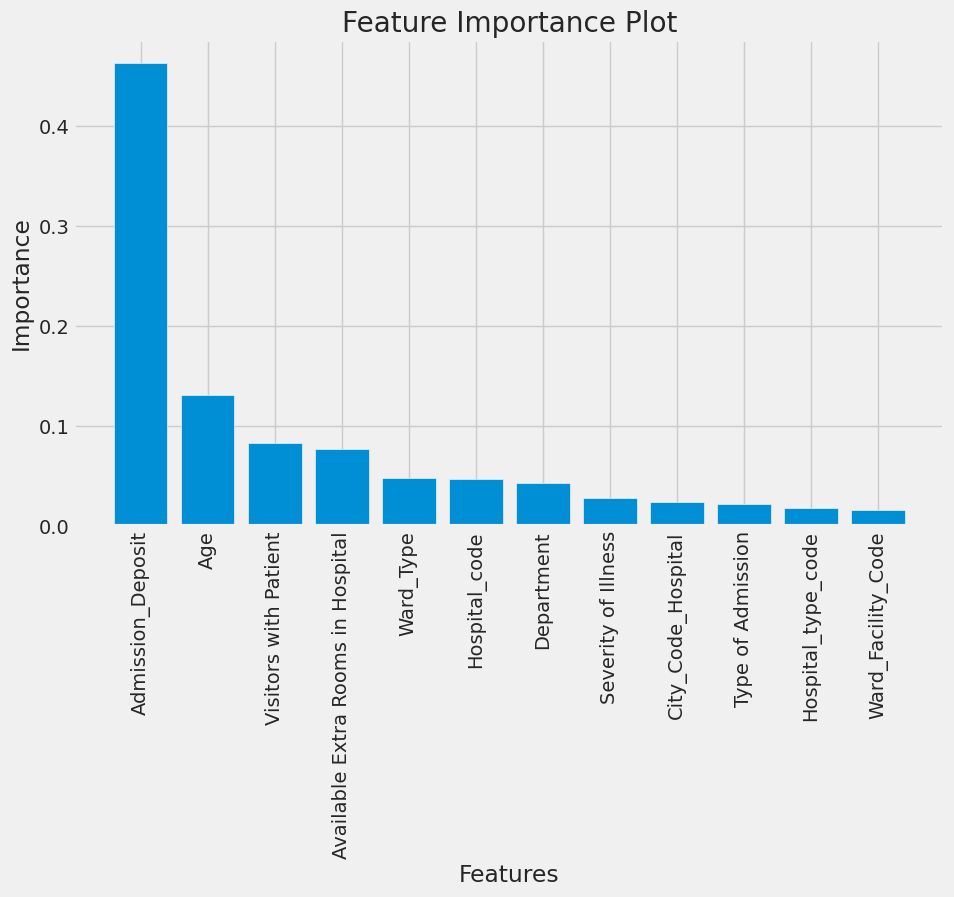


Feature Distributions for High Stay Cases (Stay >= 7):


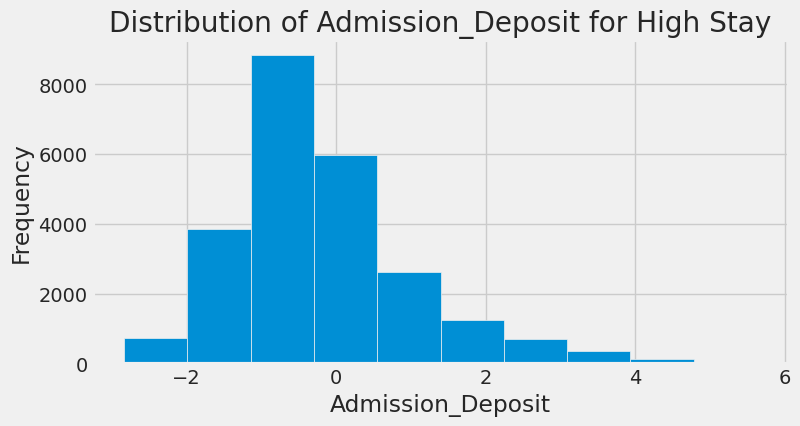

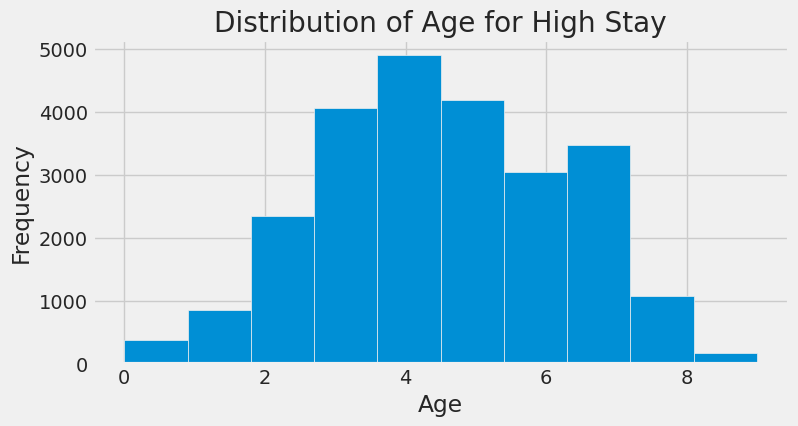

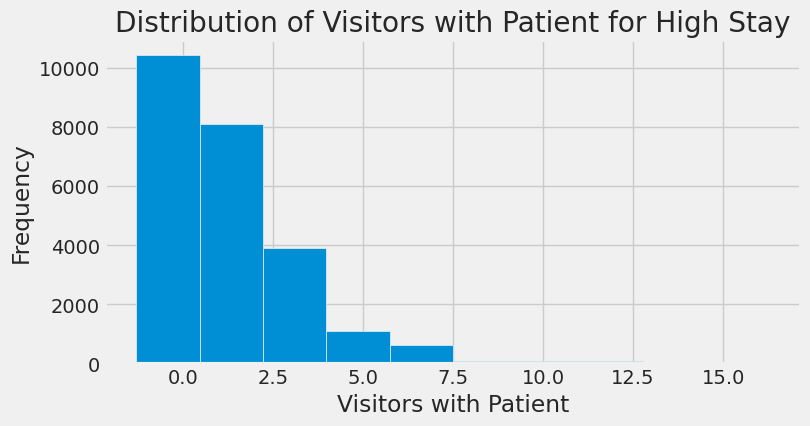

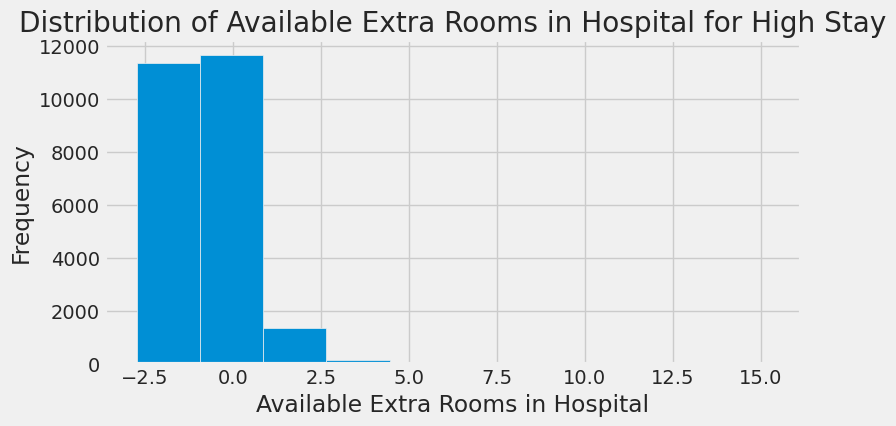

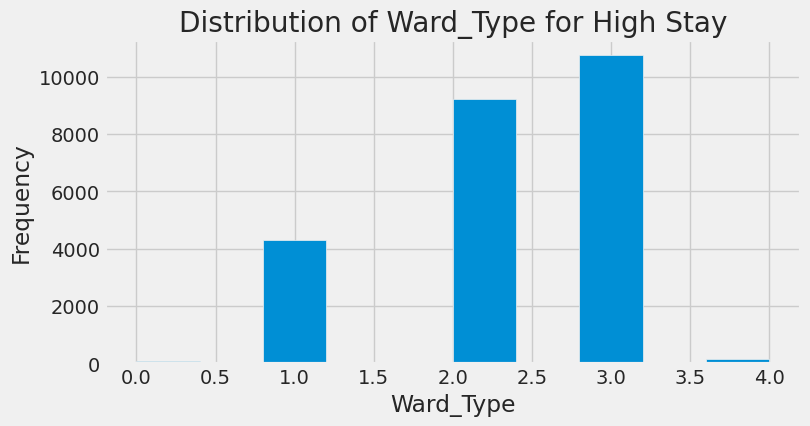

In [88]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the evaluate_model function
def evaluate_model3b(model_filename):
    """Evaluates the saved model and displays important features."""
    # Load the saved model
    with open(model_filename, "rb") as file:
        loaded_model = pickle.load(file)

    # ... (Evaluation metrics - accuracy, classification report, confusion matrix) ...

    # Get feature importances
    importances = loaded_model.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display feature importances
    print("\nFeature Importances:")
    print(feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance Plot")
    plt.show()

    # Analyze high stay predictions (Stay >= threshold)
    high_stay_threshold = 7  # Adjust as needed

    # Get the most important features (e.g., top 5)
    top_features = feature_importance_df['Feature'][:5].tolist()

    # Find samples predicted as high stay
    high_stay_samples = X_train[loaded_model.predict(X_train) >= high_stay_threshold]

    # Analyze feature distributions for high stay cases
    print("\nFeature Distributions for High Stay Cases (Stay >= {}):".format(high_stay_threshold))
    for feature in top_features:
        plt.figure(figsize=(8, 4))
        plt.hist(high_stay_samples[feature], bins=10)  # Adjust bins as needed
        plt.title("Distribution of {} for High Stay".format(feature))
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()


# Evaluate the model and display important features
evaluate_model3b(model_filename)

In [ ]:
#  Step 1: Get Predictions on Training Data

In [89]:
# Predict on training data
Y_train_prediction = decision_tree.predict(X_train)

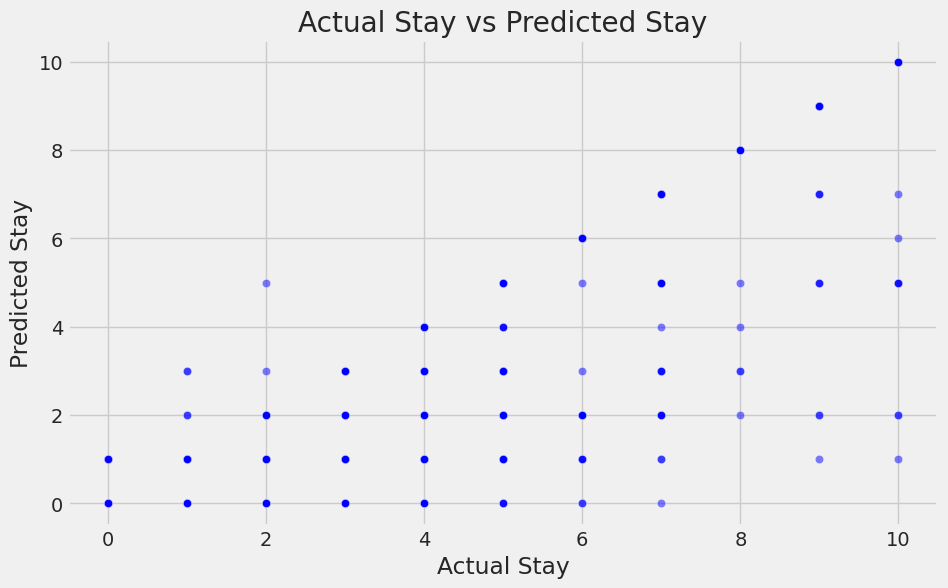

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    "Actual Stay": Y_train,
    "Predicted Stay": Y_train_prediction
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="Actual Stay", y="Predicted Stay", alpha=0.5, color="blue")

plt.title("Actual Stay vs Predicted Stay")
plt.xlabel("Actual Stay")
plt.ylabel("Predicted Stay")
plt.show()


In [ ]:
# Let’s explore a few alternative plots to evaluate your model’s performance visually:

# 1. Residual Plot
# Shows the difference between actual and predicted values—great for spotting patterns and biases.

# 2. Parity Plot (Actual vs Predicted Line)
# A 45-degree line plot to see how close the predictions are to the actual values.

# 3. Confusion Matrix (Heatmap)
# For classification problems, this is a great way to understand where your model is getting it right or wrong.

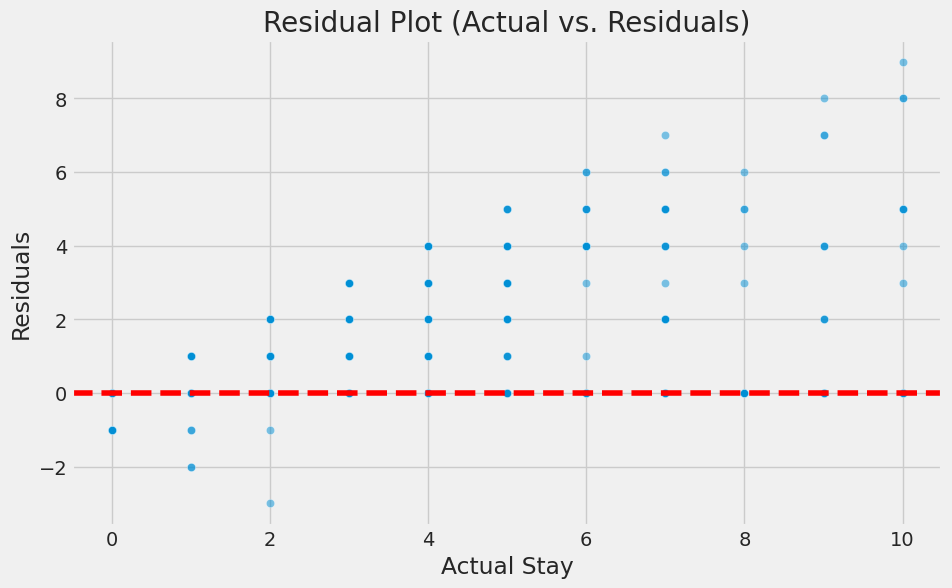

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals
residuals = Y_train - Y_train_prediction

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_train, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Actual vs. Residuals)")
plt.xlabel("Actual Stay")
plt.ylabel("Residuals")
plt.show()


In [ ]:
# What to Look For:
# Random scatter around 0: Good sign—model is well-fitted.
# Patterns or trends: Indicate model misspecification.

In [ ]:
#  Confusion Matrix (For Classification Problems)

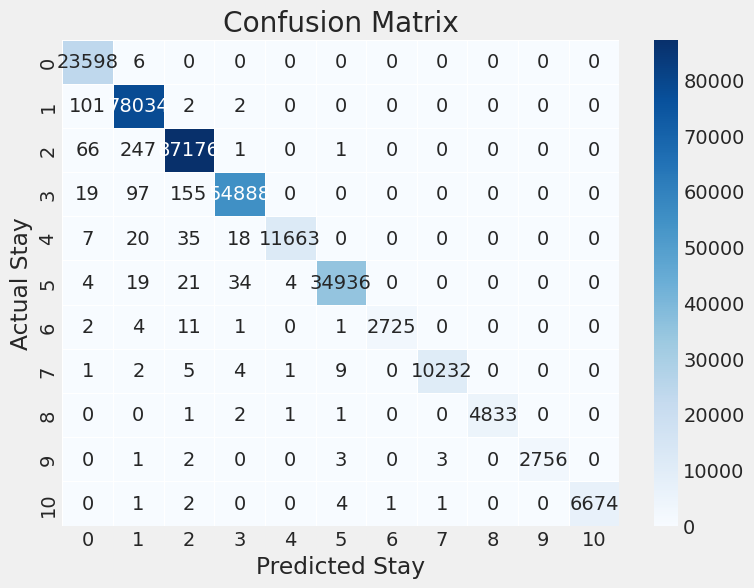

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute Confusion Matrix
cm = confusion_matrix(Y_train, Y_train_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Stay")
plt.ylabel("Actual Stay")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# ✅ Ideal Case: High values along the diagonal (correct predictions).

In [ ]:
# Line Plot (For Regression Problems)

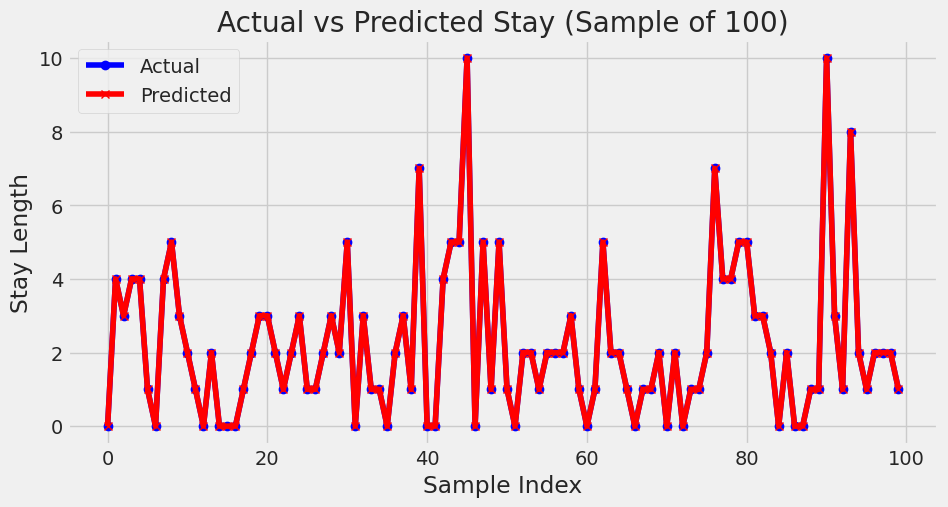

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(Y_train[:100].values, label="Actual", linestyle="-", marker="o", color="blue")
plt.plot(Y_train_prediction[:100], label="Predicted", linestyle="-", marker="x", color="red")

plt.title("Actual vs Predicted Stay (Sample of 100)")
plt.xlabel("Sample Index")
plt.ylabel("Stay Length")
plt.legend()
plt.show()


In [ ]:
#  Ideal Case: The red and blue lines should overlap closely.

In [ ]:
# 1️⃣ Histogram of Errors (Residual Plot)
# A histogram of prediction errors helps visualize the distribution of errors (Actual - Predicted).
# 🔹 If errors are centered around zero, the model is predicting well.

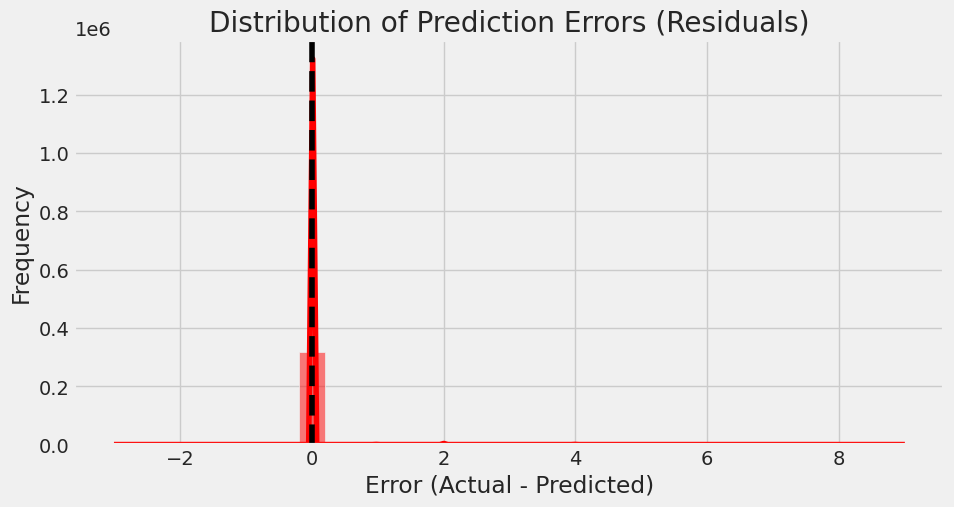

In [95]:
import numpy as np

# Calculate errors
errors = Y_train - Y_train_prediction

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True, color="red")

plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color="black", linestyle="dashed")  # Zero error line
plt.show()


In [ ]:
# ✅ Ideal Case: The errors should be symmetrical and centered around 0.

In [ ]:
# Step 1: Predict on Test Data

In [96]:
# Predict on test data
Y_test_prediction = decision_tree.predict(X_test)

In [97]:
Y_test_prediction

array([0, 7, 2, ..., 0, 1, 3])

In [102]:
# Y_test_prediction.columns


In [98]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')

In [107]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have Y_test_prediction (predicted stay classes for the test data)

# plt.figure(figsize=(10, 6))
# plt.hist(Y_test_prediction, bins=np.arange(12) - 0.5,  # Bins for 0-10 classes
#          color="skyblue", edgecolor="black", alpha=0.7)
# plt.xticks(range(11))  # Set x-axis ticks for 0-10
# plt.xlabel("Predicted Stay Class (0-10)")
# plt.ylabel("Frequency")
# plt.title("Frequency of Predicted Stay Classes in Test Data")
# plt.show()

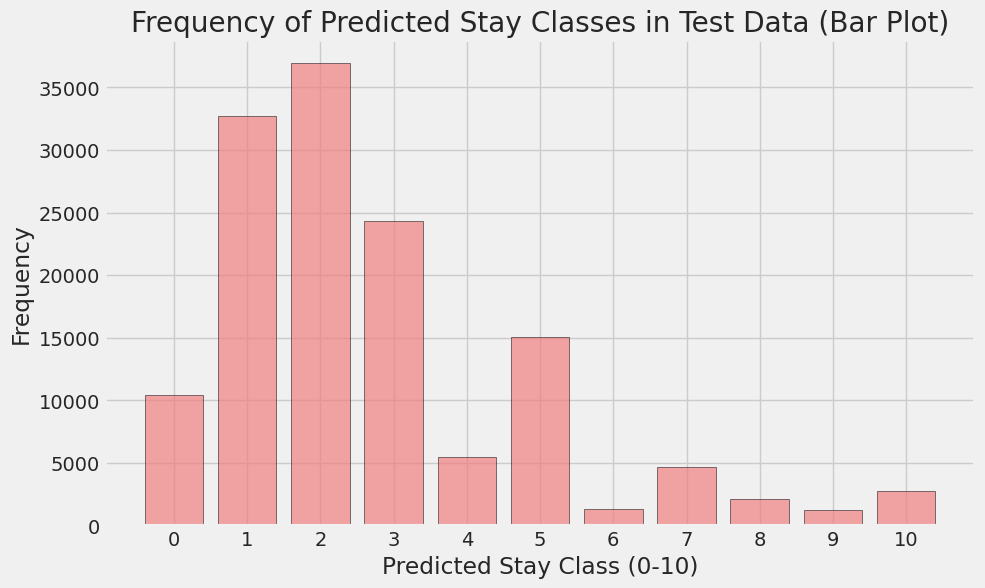

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have Y_test_prediction (predicted stay classes for the test data)

# Calculate frequencies of each stay class
stay_classes, frequencies = np.unique(Y_test_prediction, return_counts=True)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(stay_classes, frequencies, color="lightcoral", edgecolor="black", alpha=0.7)
plt.xticks(stay_classes)  # Set x-axis ticks to stay class values
plt.xlabel("Predicted Stay Class (0-10)")
plt.ylabel("Frequency")
plt.title("Frequency of Predicted Stay Classes in Test Data (Bar Plot)")
plt.show()

In [119]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Assuming you have Y_test_prediction (predicted stay classes for the test data)

# # Create DataFrame for area chart
# stay_counts = pd.DataFrame({'Stay Class': stay_classes, 'Frequency': frequencies})
# stay_counts = stay_counts.sort_values(by='Stay Class')  # Sort by stay class

# # Create area chart
# plt.figure(figsize=(10, 6))
# plt.fill_between(stay_counts['Stay Class'], stay_counts['Frequency'], color="lightgreen", alpha=0.7)
# plt.xlabel("Predicted Stay Class (0-10)")
# plt.ylabel("Frequency")
# plt.title("Frequency of Predicted Stay Classes in Test Data (Area Chart)")
# plt.grid(True)  # Add grid for better readability
# plt.show()

In [120]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have Y_test_prediction (predicted stay classes for the test data)

# # Calculate frequencies of each stay class
# stay_classes, frequencies = np.unique(Y_test_prediction, return_counts=True)

# # Create pie chart
# plt.figure(figsize=(12, 12))
# plt.pie(frequencies, labels=stay_classes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# plt.title("Frequency of Predicted Stay Classes in Test Data (Pie Chart)")
# plt.show()

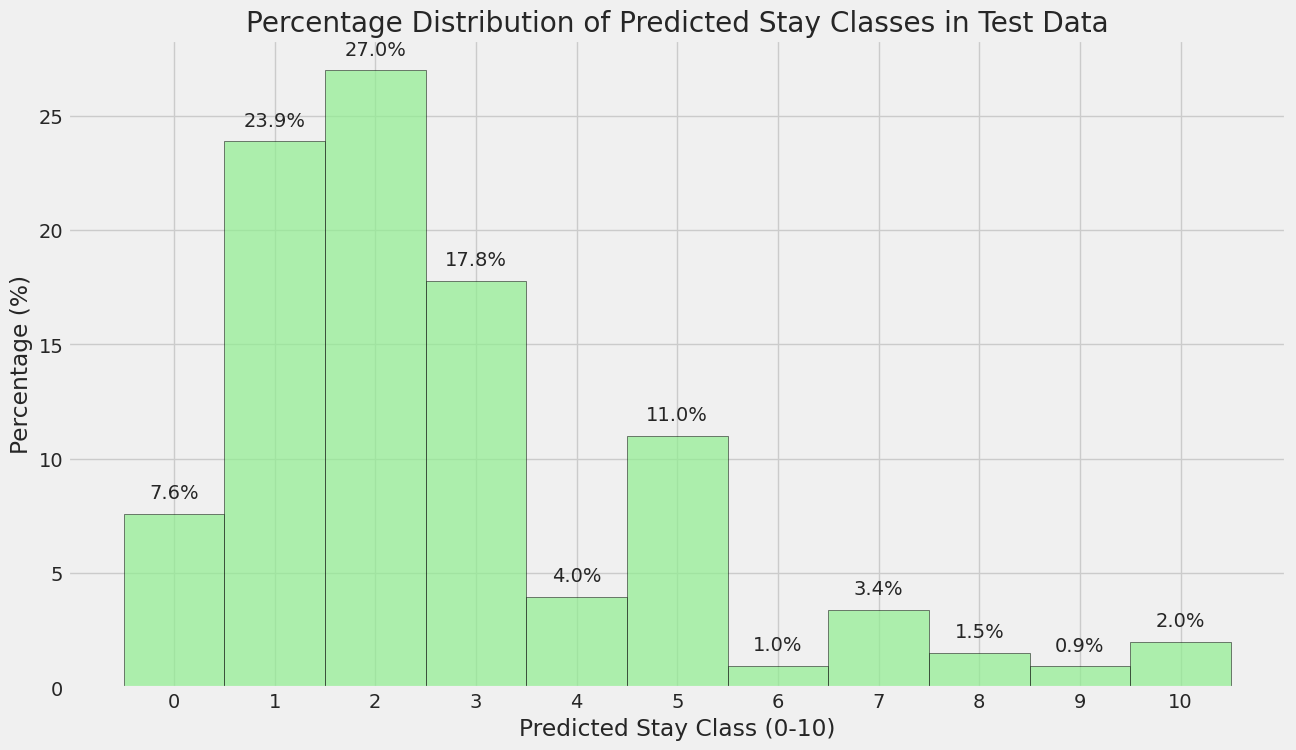

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have Y_test_prediction (predicted stay classes for the test data)

# Calculate frequencies of each stay class
stay_classes, frequencies = np.unique(Y_test_prediction, return_counts=True)

# Calculate percentages
percentages = (frequencies / len(Y_test_prediction)) * 100



# Create histogram with percentage values and annotations
plt.figure(figsize=(14, 8))
_, bins, patches = plt.hist(Y_test_prediction, bins=np.arange(12) - 0.5,  # Bins for 0-10 classes
                             weights=np.ones_like(Y_test_prediction) / len(Y_test_prediction) * 100,
                             color="lightgreen", edgecolor="black", alpha=0.7)

# Add percentage values on top of bars
for i in range(len(stay_classes)):
    x = (bins[i] + bins[i + 1]) / 2  # Center of the bar
    y = patches[i].get_height()  # Height of the bar
    plt.text(x, y + 0.5, f'{percentages[i]:.1f}%', ha='center', va='bottom')  # Adjust position as needed

plt.xticks(range(11))  # Set x-axis ticks for 0-10
plt.xlabel("Predicted Stay Class (0-10)")
plt.ylabel("Percentage (%)")
plt.title("Percentage Distribution of Predicted Stay Classes in Test Data")
plt.show()

In [ ]:
# DOWNLOAD PICKLE FILE AND WORK ON STREAMLIT

In [124]:
from google.colab import files
files.download("decision_tree_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
# Assuming you have your transformed data in X_train or X_test
import pandas as pd

# Get unique values for each important feature column
important_features = ['Type of Admission', 'Visitors with Patient', 'Age', 'Severity of Illness', 'Admission_Deposit', 'Department', 'Hospital_type_code', 'Ward_Type', 'Ward_Facility_Code', 'Available Extra Rooms in Hospital'] # Replace with your actual important feature columns

unique_values = {}
for feature in important_features:
    unique_values[feature] = pd.unique(X_train[feature])  # Or use X_test if you have transformed test data
    print(f"Unique values for {feature}: {unique_values[feature]}")

Unique values for Type of Admission: [-1.13616487  0.31530634  1.76677755]
Unique values for Visitors with Patient: [-0.72792324  0.40582594 -0.16104865  2.67332428  1.53957511  2.10644969
  5.50769721  0.97270052 -1.29479782  3.80707345  6.64144638  4.37394804
  4.94082263  3.24019887 11.74331766  7.20832097  6.0745718   9.47581931
 -1.86167241  8.90894473  8.34207014  7.77519556 11.17644307 10.0426939
 16.27831435 15.14456518 10.60956849 12.31019225]
Unique values for Age: [5 7 3 4 8 6 2 1 0 9]
Unique values for Severity of Illness: [0 2 1]
Unique values for Admission_Deposit: [ 0.02783522  0.98755589 -0.12491035 ... -2.70870292  4.19429275
 -2.32959945]
Unique values for Department: [3 1 2 0 4]
Unique values for Hospital_type_code: [2 4 1 0 5 3 6]
Unique values for Ward_Type: [2 3 1 0 4 5]
Unique values for Ward_Facility_Code: [5 4 3 1 0 2]
Unique values for Available Extra Rooms in Hospital: [-0.16917678 -1.02521686 -1.88125695  0.68686331  2.39894348  1.5429034
  3.25498357  4.111

In [ ]:
# remove cols that r dfc to convert into dictinry

In [126]:
# Assuming you have your transformed data in X_train or X_test
import pandas as pd

# Get unique values for each important feature column
important_features = ['Type of Admission', 'Age', 'Severity of Illness', 'Department', 'Hospital_type_code', 'Ward_Type', 'Ward_Facility_Code'] # Replace with your actual important feature columns

unique_values = {}
for feature in important_features:
    unique_values[feature] = pd.unique(X_train[feature])  # Or use X_test if you have transformed test data
    print(f"Unique values for {feature}: {unique_values[feature]}")

Unique values for Type of Admission: [-1.13616487  0.31530634  1.76677755]
Unique values for Age: [5 7 3 4 8 6 2 1 0 9]
Unique values for Severity of Illness: [0 2 1]
Unique values for Department: [3 1 2 0 4]
Unique values for Hospital_type_code: [2 4 1 0 5 3 6]
Unique values for Ward_Type: [2 3 1 0 4 5]
Unique values for Ward_Facility_Code: [5 4 3 1 0 2]


In [ ]:
#  let's create a Streamlit UI for your model, allowing users to input values for the important features and get predictions for the stay class.

# First, we need to find the unique values of the transformed columns. Since we don't have the original X_train and X_test DataFrames in this context, I'll provide a general approach. You can adapt this to your specific transformed data.

# Finding Unique Values (General Approach):


# # Assuming you have your transformed data in X_train or X_test
# import pandas as pd

# # Get unique values for each important feature column
# important_features = ['Type of Admission', 'Visitors with Patient', 'Age', 'Severity of Illness', 'Admission_Deposit', 'Department', 'Hospital_type_code', 'Ward_Type', 'Ward_Facility_Code', 'Available Extra Rooms in Hospital'] # Replace with your actual important feature columns

# unique_values = {}
# for feature in important_features:
#     unique_values[feature] = pd.unique(X_train[feature])  # Or use X_test if you have transformed test data
#     print(f"Unique values for {feature}: {unique_values[feature]}")
# Use code with caution
# Creating Streamlit UI:


# import streamlit as st
# import pickle

# # Load your trained model
# model_filename = "decision_tree_model.pkl"  # Replace with your actual model filename
# with open(model_filename, "rb") as file:
#     model = pickle.load(file)

# # Streamlit UI
# st.title("Length of Stay Prediction")

# # Input fields for important features
# input_data = {}
# for feature, values in unique_values.items():
#     if len(values) <= 10:  # Use selectbox for categorical features with few unique values
#         input_data[feature] = st.selectbox(f"{feature}:", values)
#     else:  # Use number input for numerical or categorical features with many unique values
#         input_data[feature] = st.number_input(f"{feature}:", min_value=min(values), max_value=max(values), value=int(np.mean(values))) # Assuming numerical

# # Create input DataFrame
# input_df = pd.DataFrame([input_data])

# # Make prediction
# if st.button("Predict"):
#     prediction = model.predict(input_df)[0]
#     st.success(f"Predicted Stay Class: {prediction}")
# Use code with caution
# Explanation

# Finding Unique Values:

# This code assumes you have your transformed data in either X_train or X_test.
# It iterates through the important_features list and uses pd.unique() to get the unique values for each feature.
# The unique values are stored in the unique_values dictionary.
# Streamlit UI:

# st.title: Sets the title of the UI.
# Input Fields:
# We iterate through the unique_values dictionary to create input fields for each feature.
# If a feature has fewer than or equal to 10 unique values, we use st.selectbox to create a dropdown menu.
# For features with more than 10 unique values, we use st.number_input to allow users to enter a numerical value within the range of the feature's values.
# Prediction:
# When the "Predict" button is clicked:
# The input values are used to create a DataFrame (input_df).
# The model makes a prediction using model.predict(input_df).
# The predicted stay class is displayed using st.success.
# To Run the Streamlit App

# Save the code as a Python file (e.g., app.py).
# Open a terminal or command prompt.
# Navigate to the directory where you saved the file.
# Run the command: streamlit run app.py
# Now, you should have a Streamlit UI running in your web browser where users can enter values for the important features and get predictions for the stay class! Remember to replace the placeholder feature names and file paths with your actual data and model information. Let me know if you have any other questions.

In [ ]:
# DOWNLOAD PICKLE FILE AND WORK ON STREAMLIT

In [128]:
from google.colab import files
files.download("decision_tree_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
############   part 2 for UI ......... RMV COLS DFC 1S

In [ ]:
# ValueError: The feature names should match those that were passed during fit.
# Feature names seen at fit time, yet now missing:
# Admission_Deposit  ot
# Available Extra Rooms in Hospital   ot
# City_Code_Hospital    ot
# Hospital_code     ot
# Visitors with Patient - ot

In [136]:
X_train = train.drop(['case_id', 'Stay'], axis=1)
columns_to_remove = [ 'Available Extra Rooms in Hospital', 'Visitors with Patient' , 'City_Code_Hospital', 'Hospital_code']
#  'Admission_Deposit',
# Remove columns from X_train for UI streamlit
X_train = X_train.drop(columns=columns_to_remove)

Y_train = train["Stay"]
X_test  = test.drop("case_id", axis=1).copy()
X_test = X_test.drop(columns=columns_to_remove)
X_train.shape, Y_train.shape, X_test.shape

((318438, 8), (318438,), (137057, 8))

In [137]:
# Decision Tree
decision_tree_unq = DecisionTreeClassifier()
decision_tree_unq.fit(X_train, Y_train)
Y_pred_test = decision_tree_unq.predict(X_test)
acc_decision_tree = round(decision_tree_unq.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.81

In [138]:
# Save Model as Pickle File
model_filename_unq = "decision_tree_unq_model.pkl"
with open(model_filename_unq, "wb") as file:
    pickle.dump(decision_tree_unq, file)

print(f"Model saved as {model_filename_unq}")

Model saved as decision_tree_unq_model.pkl


In [139]:
from google.colab import files
files.download("decision_tree_unq_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>